In [1]:
%pylab inline

import cv2
import numpy as np
import time as t
import pylab as pl

# Helper function
def swap_and_show(img):
    """ Swaps the color from BGR to RGB mode, for transfer
    of image from cv2 to pylab domain """
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img
   

Populating the interactive namespace from numpy and matplotlib


## 1. Reading & Displaying Images

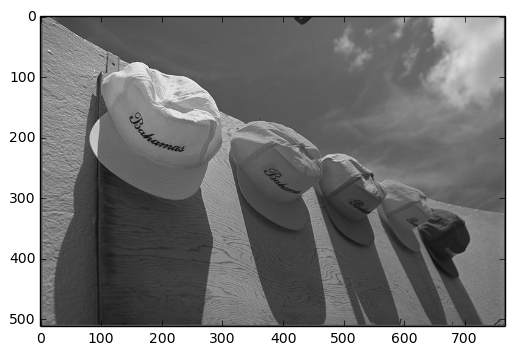

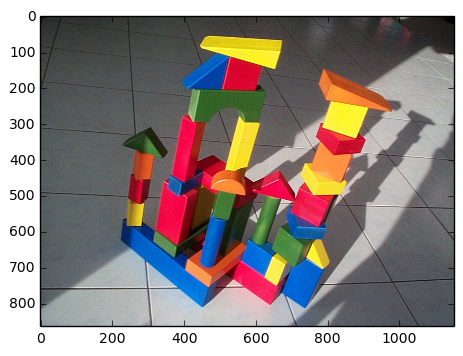

In [2]:
cap_img = cv2.imread("cap.bmp", cv2.IMREAD_COLOR)
lego_img = cv2.imread("lego.tif", cv2.IMREAD_COLOR)

cap_img.shape
figure()
imshow(swap_and_show(cap_img))
figure()
imshow(swap_and_show(lego_img))

## 1. RGB to Grayscale Conversion & Display 

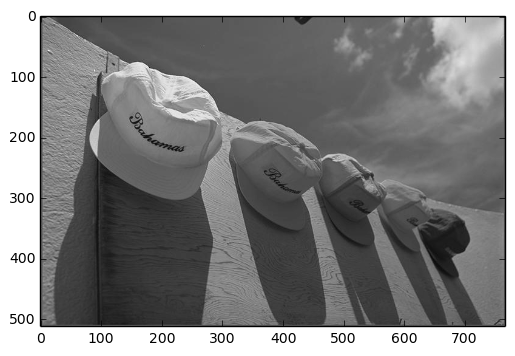

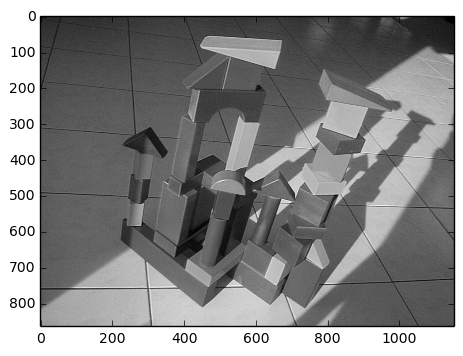

In [3]:
def rgb2gray(img):
    gray = np.mean(img, axis=2)
    return gray

gray_cap_img = rgb2gray(cap_img)
gray_lego_img = rgb2gray(lego_img)

figure()
imshow(gray_cap_img, cmap='gray')
figure()
imshow(gray_lego_img, cmap='gray')

## 2. Addition of Gaussian Noise, Median & Mean Filtering

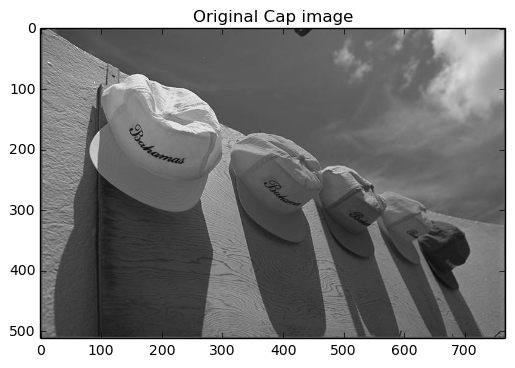

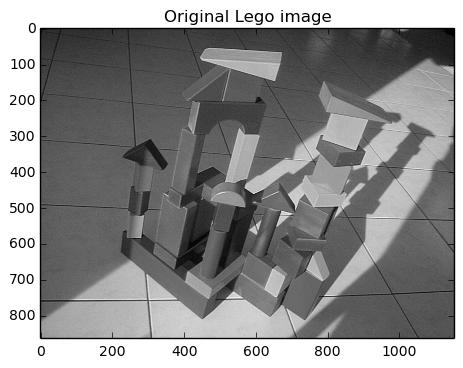

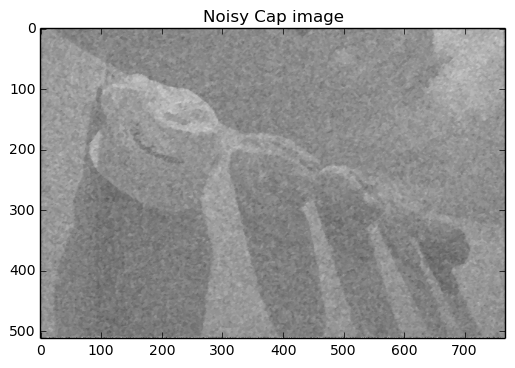

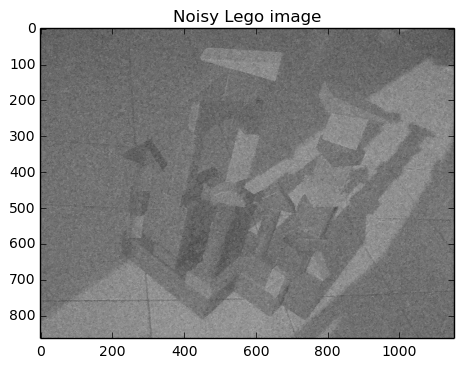

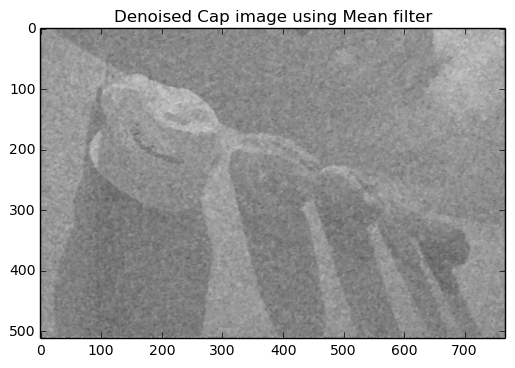

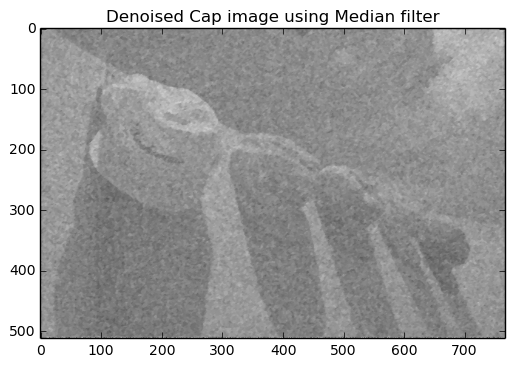

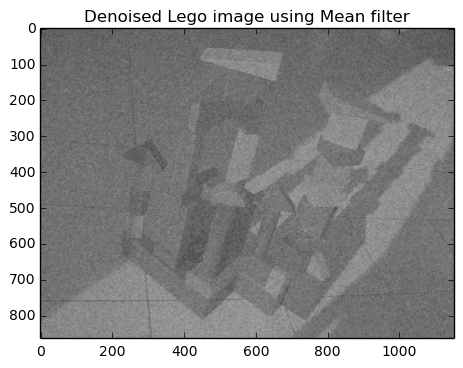

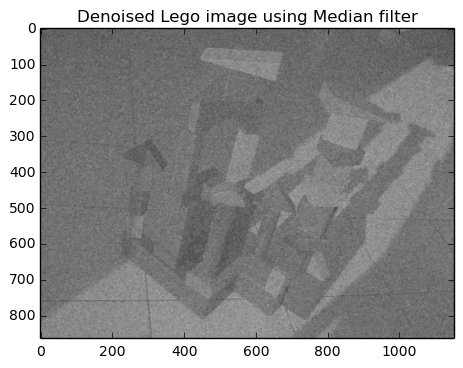

In [6]:
def noised_image(clean_img, stddev):
    noise = np.zeros(clean_img.shape)
    cv2.randn(noise, (0), (stddev))
    noised_img = noise + clean_img
    return noised_img

def mean_filter(img):
    # Return
    nrows, ncols = img.shape
    filtered_image = img
    for row in xrange(1,nrows-1):
        for col in xrange(1,ncols-1):
            filtered_image[row, col] = np.mean(img[row-1:row+2, col-1:col+2])
    return filtered_image

def median_filter(img):
    # Return
    nrows, ncols = img.shape
    filtered_image = img
    for row in xrange(1,nrows-1):
        for col in xrange(1,ncols-1):
            roi = img[row-1:row+2, col-1:col+2]
            filtered_image[row, col] = np.sort(roi.ravel())[4]
    return filtered_image   

# You can change the value here, and press Shift+Enter to re-run the code
stddev = 99

# Adding noise to the images
noisy_cap_img = noised_image(gray_cap_img, stddev)
noisy_lego_img = noised_image(gray_lego_img, stddev)

# Denoise the images
denoised_cap_img_mean = mean_filter(noisy_cap_img)
denoised_cap_img_median = median_filter(noisy_cap_img)

denoised_lego_img_mean = mean_filter(noisy_lego_img)
denoised_lego_img_median = median_filter(noisy_lego_img)

# Show Original images
figure()
title('Original Cap image')
imshow(gray_cap_img, cmap='gray')
figure()
title('Original Lego image')
imshow(gray_lego_img, cmap='gray')

# Show noisy images
figure()
title('Noisy Cap image')
imshow(noisy_cap_img, cmap='gray')
figure()
title('Noisy Lego image')
imshow(noisy_lego_img, cmap='gray')

# Show denoised images
figure()
title('Denoised Cap image using Mean filter')
imshow(denoised_cap_img_mean, cmap='gray')
figure()
title('Denoised Cap image using Median filter')
imshow(denoised_cap_img_median, cmap='gray')
figure()
title('Denoised Lego image using Mean filter')
imshow(denoised_lego_img_mean, cmap='gray')
figure()
title('Denoised Lego image using Median filter')
imshow(denoised_lego_img_median, cmap='gray')